# Cleaning data

## First inspection/ Handling inconsistent data

In [1]:
import pandas as pd

### Titanic dataset

In [2]:
titanic = pd.read_csv('titanic_imp.csv')

In [3]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [4]:
titanic.tail()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   Sibsp     894 non-null    int64 
 5   Parch     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [6]:
titanic.describe()

,Class,Sibsp,Parch
count,894.000000,894.000000,894.000000
mean,2.309843,0.522371,0.381432
std,0.835370,1.101283,0.805171
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000
max,3.000000,8.000000,6.000000


In [7]:
titanic[['Survived', 'Gender', 'Age', 'Fare', 'Emb', 'Deck']].describe()

,Survived,Gender,Age,Fare,Emb,Deck
count,894,894,758,894,892,203
unique,4,2,92,248,3,7
top,0,male,Missing Data,$8.05,S,C
freq,551,580,41,43,647,59


In [8]:
titanic.Survived.unique()  # 4 unique values?? we only should have 2

array(['0', '1', 'yes', 'no'], dtype=object)

In [9]:
titanic.Survived.value_counts()

0      551
1      341
yes      1
no       1
Name: Survived, dtype: int64

In [10]:
titanic.Survived.replace(to_replace = ['yes', 'no'], value = [1, 0], inplace = True)

In [11]:
titanic.Survived.value_counts()

0    551
1    341
1      1
0      1
Name: Survived, dtype: int64

## Olympic Dataset

In [12]:
summer = pd.read_csv('summer_imp.csv')

In [13]:
summer.head()    # we shouldn't have a space in column label

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [14]:
summer.Athlete Name       # can't select, lets rename

SyntaxError: invalid syntax (Temp/ipykernel_8788/2064937884.py, line 1)

In [15]:
summer.rename(columns = {'Athlete Name': 'Athlete_Name'}, inplace = True)

In [16]:
summer.head(20)      # we have 'Gold Medal' and 'Gold' both, let's change that

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold Medal
7,1896,Athens,Aquatics,Swimming,"Andreou, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"Chorophas, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"Neumann, Paul",AUT,Men,400M Freestyle,Gold Medal


In [17]:
summer.Medal.replace(to_replace = 'Gold Medal', value = 'Gold', inplace = True)

In [18]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [19]:
summer.iloc[:, 1:].describe()  # let's check the non numrical columns for inconsistencies

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31170,31170,31170,31170,31166,31170,31170,31170
unique,22,43,67,22763,147,2,666,3
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3639,22,4586,22751,1497,10487


## String Operations

### Titanic dataset

string inconsistencies are not obv so we have to look carefully.

In [20]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [21]:
titanic.info()   # fare must be float but it's string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   Sibsp     894 non-null    int64 
 5   Parch     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [22]:
pd.to_numeric(titanic.Fare)   # this method doesn't recognise the '$' dollar sign like excel

ValueError: Unable to parse string "$7.25" at position 0

In [23]:
titanic.Fare =  titanic.Fare.str.replace('$', '', regex = True)  # use string method 'replace'

In [24]:
titanic.Fare.head()  # success in removing the dollar sign

0       7.25
1    71.2833
2      7.925
3       53.1
4       8.05
Name: Fare, dtype: object

### Olympic Dataset

In [25]:
summer.head()  # some last names of Athletes are uppercase and some are lowercase

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [26]:
summer.Athlete_Name = summer.Athlete_Name.str.title()

In [27]:
summer.head()   # noice

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [28]:
summer.loc[summer.Athlete_Name == 'Hajos, Alfred']  # no result, why??, let's try iloc operator

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal


In [29]:
summer.iloc[0,4]   # there are blank spaces before name but we can't see in dataframe!!

' Hajos, Alfred '

In [30]:
summer.loc[summer.Athlete_Name.str.contains('Hajos, Alfred')]   # use string method 'contains'

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


let's remove the blank spaces in names:

In [31]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()    # use method lstrip() for left and rstrip() for right spaces

In [32]:
summer.loc[summer.Athlete_Name == 'Hajos, Alfred']   # works now!!

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


## Changing datatype with astype() / pd.to_numeric

### titanic dataset

In [33]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.25,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.925,S,NaN
3,1,1,female,35.0,1,0,53.1,S,C
4,0,3,male,35.0,0,0,8.05,S,NaN


In [34]:
titanic.info()   # fare is stil string but should be numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   Sibsp     894 non-null    int64 
 5   Parch     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


option 1:

In [36]:
pd.to_numeric(titanic.Fare)    # works now as there's no $ sign now

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

option 2:  ( preferable/ general)

In [37]:
titanic.Fare.astype('float')

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
889    30.0000
890     7.7500
891    10.5000
892    14.4000
893     7.8958
Name: Fare, Length: 894, dtype: float64

In [38]:
titanic["Fare"] = titanic.Fare.astype('float')

In [39]:
titanic["Survived"] = titanic.Survived.astype('int')

In [40]:
titanic["Age"] = titanic.Age.astype('float')   # doesn't work as there is missing data

ValueError: could not convert string to float: 'Missing Data'

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   Sibsp     894 non-null    int64  
 5   Parch     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


### Olympic dataset


In [42]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [44]:
summer.info()  # all datatypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


## Intro to NA values

In [45]:
import numpy as np

In [47]:
sales = pd.read_csv('sales.csv', index_col = 0)

In [48]:
sales.head()   # Steven has a missing value

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [49]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [51]:
sales.loc["Steven", 'Thu']  # missing value

nan

making our own missing values

In [52]:
sales.iloc[2,2] = np.nan  

In [54]:
sales   # another null value generated

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15.0,NaN,33
Mike,45,9,74.0,87.0,12
Andi,17,33,NaN,8.0,29
Paul,87,67,27.0,45.0,7


sometimes there can just be a blank space instead of 'Nan' and we don't see any missing values 

In [56]:
sales.iloc[2,2] = ' '

In [57]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15.0,NaN,33
Mike,45,9,74.0,87.0,12
Andi,17,33,,8.0,29
Paul,87,67,27.0,45.0,7


In [60]:
sales.info()     # wed has no null values but has a blank space, it's a problem!!

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      object 
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 364.0+ bytes


also, sometimes people put 'no data' in the place of NaN, it's also a problem

## Detecting missing values

### Titanic Dataset

In [64]:
titanic.head(10)    # 'missing data' in age

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
6,0,1,male,54.0,0,0,51.8625,S,E
7,0,3,male,2.0,3,1,21.0750,S,NaN
8,1,3,female,27.0,0,2,11.1333,S,NaN
9,1,2,female,14.0,1,0,30.0708,C,NaN


In [65]:
titanic.tail(10)   # NaN in Age

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
884,0,3,male,25.0,0,0,7.0500,S,NaN
885,0,3,female,39.0,0,5,29.1250,Q,NaN
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN
893,0,3,male,36.0,0,0,7.8958,S,NaN


In [66]:
titanic.info()  # age has null values + 'Missing values' strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       758 non-null    object 
 4   Sibsp     894 non-null    int64  
 5   Parch     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 59.5+ KB


In [67]:
titanic.isna() # detects NaN values

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,True


In [70]:
titanic.isna().sum(axis = 0)   # counts the no.of missing values per column

Survived      0
Class         0
Gender        0
Age         136
Sibsp         0
Parch         0
Fare          0
Emb           2
Deck        691
dtype: int64

In [72]:
titanic.isna().any(axis = 0)  # are there any missing values in each column?

Survived    False
Class       False
Gender      False
Age          True
Sibsp       False
Parch       False
Fare        False
Emb          True
Deck         True
dtype: bool

In [73]:
titanic.isna().any(axis = 1)  # above but for each row

0       True
1      False
2       True
3      False
4       True
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

In [75]:
titanic[titanic.isna().any(axis = 1)]  # all the rows with missing values

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
2,1,3,female,26.0,0,0,7.9250,S,NaN
4,0,3,male,35.0,0,0,8.0500,S,NaN
5,0,3,male,Missing Data,0,0,8.4583,Q,NaN
7,0,3,male,2.0,3,1,21.0750,S,NaN
...,...,...,...,...,...,...,...,...,...
888,0,3,female,NaN,1,2,23.4500,S,NaN
890,0,3,male,32.0,0,0,7.7500,Q,NaN
891,0,2,male,24.0,0,0,10.5000,S,NaN
892,0,3,male,34.0,1,1,14.4000,S,NaN


In [76]:
titanic.notna()    # opposite of isna()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
889,True,True,True,True,True,True,True,True,True
890,True,True,True,True,True,True,True,True,False
891,True,True,True,True,True,True,True,True,False
892,True,True,True,True,True,True,True,True,False


In [77]:
titanic.notna().sum(axis = 0)  # non null values, same as info()

Survived    894
Class       894
Gender      894
Age         758
Sibsp       894
Parch       894
Fare        894
Emb         892
Deck        203
dtype: int64

In [78]:
titanic.notna().all(axis = 0)

Survived     True
Class        True
Gender       True
Age         False
Sibsp        True
Parch        True
Fare         True
Emb         False
Deck        False
dtype: bool

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

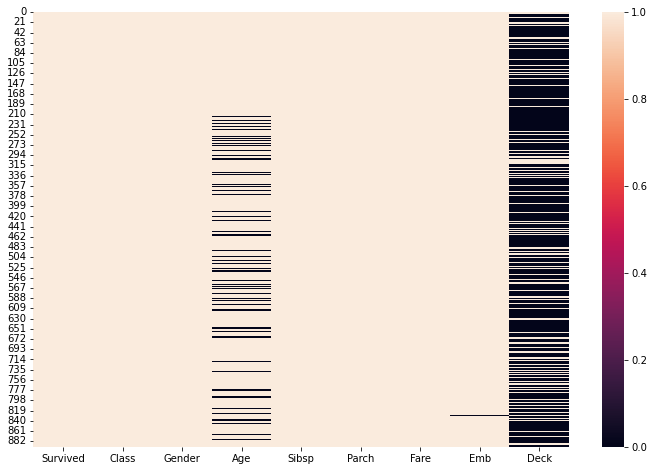

In [81]:
plt.figure(figsize = (12, 8))
sns.heatmap(titanic.notna())
plt.show()   # black is missing value

In [82]:
titanic.Age.value_counts(dropna = False) # counting all inconsstencies in Age

NaN             136
Missing Data     41
24.0             31
22.0             27
18.0             26
               ... 
55.5              1
66.0              1
0.92              1
23.5              1
74.0              1
Name: Age, Length: 93, dtype: int64

In [83]:
titanic.Age.replace(to_replace = 'Missing Data', value = np.nan, inplace = True)

In [84]:
titanic.Age.value_counts(dropna = False)   # string 'missing data' is gone

NaN     177
24.0     31
22.0     27
18.0     26
28.0     25
       ... 
55.5      1
66.0      1
0.92      1
23.5      1
74.0      1
Name: Age, Length: 92, dtype: int64

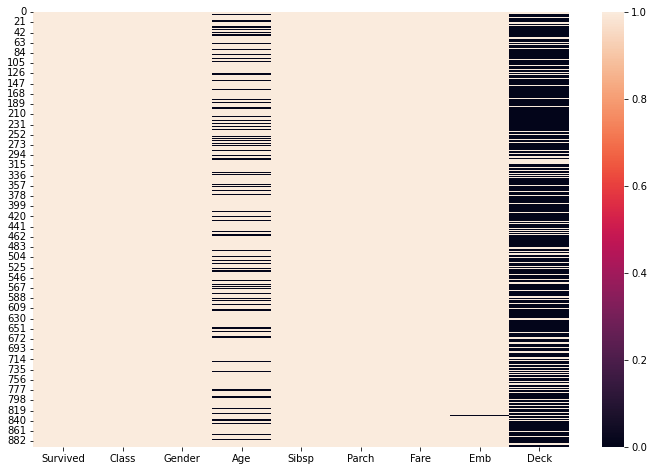

In [85]:
plt.figure(figsize = (12, 8))   # more missing data in Age
sns.heatmap(titanic.notna())
plt.show()   # black is missing value

In [86]:
titanic.Age = titanic.Age.astype('float') #success!!

### Olympic dataset

In [87]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [88]:
summer.info()   # 4 missing values in Country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [90]:
summer[summer.isna().any(axis = 1)]  # rows with missing values

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


## Removing missing values with dropna()

### Titanic Dataset

In [91]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [92]:
titanic.info()  # 2 missing values in emb column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   Sibsp     894 non-null    int64  
 5   Parch     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 59.5+ KB


In [93]:
titanic[titanic.Emb.isna()]   # we can just leave these values here, not important in further analysis

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb,Deck
61,1,1,female,38.0,0,0,80.0,NaN,B
829,1,1,female,62.0,0,0,80.0,NaN,B


In [94]:
titanic.Age.value_counts(dropna = False)  # 177 Na values

NaN      177
24.00     31
22.00     27
18.00     26
28.00     25
        ... 
55.50      1
66.00      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 92, dtype: int64

In [95]:
titanic.Age.mean(skipna = True)  # NaN values can be skipped and don't need to be removed

30.718507670850766

In [97]:
titanic.shape

(894, 9)

In [99]:
titanic.dropna().shape   # only 182 rows left after dropping NaN values as the method removes the whole row with any NaN

(182, 9)

too many rows have been deleted, let's set other parameters

In [100]:
titanic.dropna(axis = 0, how = 'any').shape  # same as above as it's the default params

(182, 9)

In [101]:
titanic.dropna(axis = 1, how = 'any').shape   # dropping columns

(894, 6)

In [102]:
titanic.dropna(axis = 0, how = 'all').shape  # no change as there's no rows with all values NaN

(894, 9)

In [103]:
titanic.dropna(axis = 0, thresh = 8).shape  # (thresh = n) param, drop all rows with less than n non null values

(736, 9)

In [105]:
titanic.dropna(axis = 1, thresh = 500).shape  # drop columns with less than 500 non missing values

(894, 8)

In [106]:
titanic.dropna(axis = 1, thresh = 500, inplace = True)

In [107]:
titanic.head()  # deck column is dropped

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


subset param in dropna()

In [112]:
titanic.dropna(axis = 0, subset = ['Survived', 'Class', 'Gender', 'Age'], how = 'any').shape  #drop columns where no values are null in the subset columns

(717, 8)

### Olympic dataset

In [113]:
summer.info()  # 4 missing values in Country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete_Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [120]:
summer[summer.isna().any(axis = 1)]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
29608,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31077,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31096,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31115,2012,London,Wrestling,Wrestling Freestyle,"Kudukhov, Besik",NaN,Men,Wf 60 KG,Silver


let's drop the na rows

In [121]:
summer.dropna(inplace = True)

In [123]:
summer.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


## replacing missing values with filna()

In [124]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [125]:
titanic.info()    # missing values in Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   Sibsp     894 non-null    int64  
 5   Parch     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


good idea in a numeric column is to replace missing values by mean/median of that column

In [126]:
titanic.Age.mean()

30.718507670850766

In [128]:
mean = round(titanic.Age.mean(), 1)
mean

30.7

In [129]:
titanic.Age.fillna(mean, inplace = True)

In [130]:
titanic.head(6)   # no. 6 has been filled with mean age

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,30.7,0,0,8.4583,Q


In [132]:
titanic.info()  # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   Sibsp     894 non-null    int64  
 5   Parch     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


## Detection of duplicates

duplicates aren't good for analysis


In [134]:
alphabet = pd.DataFrame(['a', 'b', 'c', 'c', 'd', 'e', 'f', 'g', 'g', 'g'], columns = ['Alphabet'])

In [135]:
alphabet

,Alphabet
0,a
1,b
2,c
3,c
4,d
5,e
6,f
7,g
8,g
9,g


In [137]:
alphabet.duplicated(keep = False)  # shows us if a particular value is a duplicate
                                   # keep = False, all duplicates are true
                                   # if keep = first, first duplicate is false

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
8     True
9     True
dtype: bool

In [138]:
alphabet[alphabet.duplicated(keep = False)]

,Alphabet
2,c
3,c
7,g
8,g
9,g


### titanic dataset


In [139]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [140]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    int32  
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       894 non-null    float64
 4   Sibsp     894 non-null    int64  
 5   Parch     894 non-null    int64  
 6   Fare      894 non-null    float64
 7   Emb       892 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.5+ KB


In [147]:
titanic.duplicated(keep = 'first').sum()  # these are potential duplicates

114

there is no key identifier column like Name so it's difficult to detect duplicates

In [145]:
titanic[titanic.duplicated(keep = False)]   # duplicated rows

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
4,0,3,male,35.0,0,0,8.0500,S
26,0,3,male,30.7,0,0,7.2250,C
28,1,3,female,30.7,0,0,7.8792,Q
29,0,3,male,30.7,0,0,7.8958,S
32,1,3,female,30.7,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


### Olympic dataset

In [148]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [149]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31166 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31166 non-null  int64 
 1   City          31166 non-null  object
 2   Sport         31166 non-null  object
 3   Discipline    31166 non-null  object
 4   Athlete_Name  31166 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31166 non-null  object
 7   Event         31166 non-null  object
 8   Medal         31166 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [154]:
summer.duplicated(keep = 'first').sum()

7

In [153]:
summer[summer.duplicated(keep = False)]  # these are actual duplicates

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
2068,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
2069,1912,Stockholm,Athletics,Athletics,"Lelong, Charles Louis",FRA,Men,4X400M Relay,Silver
12252,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
12253,1968,Mexico,Fencing,Fencing,"Kalmar, Janos",HUN,Men,Sabre Team,Bronze
15595,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
15596,1980,Moscow,Boxing,Boxing,"Mustafov, Ismail",BUL,Men,- 48KG (Light-Flyweight),Bronze
16101,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"Singh, Singh",IND,Men,Hockey,Gold
21832,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold
21833,1996,Atlanta,Baseball,Baseball,"Scull, Antonio",CUB,Men,Baseball,Gold


## Handling/ Removing Duplicates

### titanic dataset

In [155]:
titanic.tail()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
889,1,1,male,26.0,0,0,30.0000,C
890,0,3,male,32.0,0,0,7.7500,Q
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S
893,0,3,male,36.0,0,0,7.8958,S


In [156]:
titanic.duplicated().sum()

114

In [157]:
titanic[titanic.duplicated()]    # last 3 are certain duplictes put in for this tutorial so we delete them

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
47,1,3,female,30.7,0,0,7.7500,Q
76,0,3,male,30.7,0,0,7.8958,S
77,0,3,male,30.7,0,0,8.0500,S
87,0,3,male,30.7,0,0,8.0500,S
95,0,3,male,30.7,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S
886,0,2,male,27.0,0,0,13.0000,S
891,0,2,male,24.0,0,0,10.5000,S
892,0,3,male,34.0,1,1,14.4000,S


In [158]:
titanic.drop(index = [891, 892, 893], inplace = True)

In [159]:
titanic.tail()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,30.7,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [160]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Class     891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   Sibsp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Emb       889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 59.2+ KB


dropping duplicates with drop_duplicates()

In [164]:
alphabet[alphabet.duplicated(keep = False)]

,Alphabet
2,c
3,c
7,g
8,g
9,g


In [165]:
alphabet.drop_duplicates(keep = 'first', inplace = True)

In [166]:
alphabet  # duplicates removed!!

,Alphabet
0,a
1,b
2,c
4,d
5,e
6,f
7,g


## Detection of outliers

In [167]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [169]:
titanic.describe()   # age 490??!?!?!?

,Survived,Class,Age,Sibsp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,30.712761,0.523008,0.381594,32.204208
std,0.486592,0.836071,21.588838,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.700000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,490.000000,8.000000,6.000000,512.329200


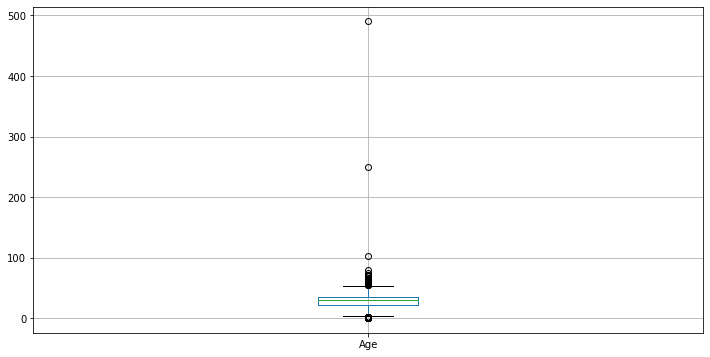

In [170]:
plt.figure(figsize = (12,6))
titanic.boxplot('Age')     # making a boxplot
plt.show() 

^^^ there are values at around 100, 250 and 500

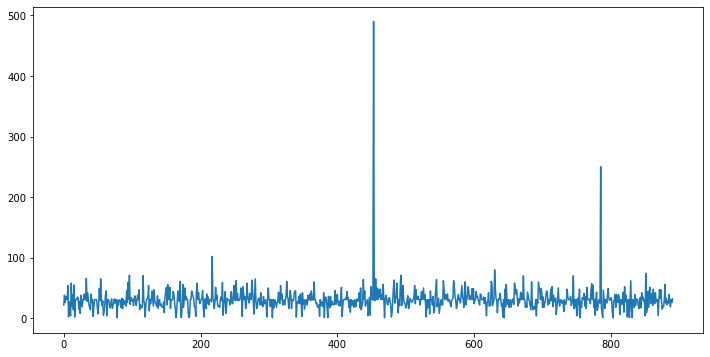

In [171]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

^^^ 3 outliers

In [173]:
titanic.Age.sort_values(ascending = False)

453    490.00
785    250.00
217    102.00
630     80.00
851     74.00
        ...  
831      0.83
469      0.75
644      0.75
755      0.67
803      0.42
Name: Age, Length: 891, dtype: float64

In [174]:
titanic.loc[titanic.Age > 90]

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [175]:
titanic.Fare.sort_values(ascending = False)  # passengers paid 512 so that's cool

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
         ...   
633      0.0000
413      0.0000
822      0.0000
732      0.0000
674      0.0000
Name: Fare, Length: 891, dtype: float64

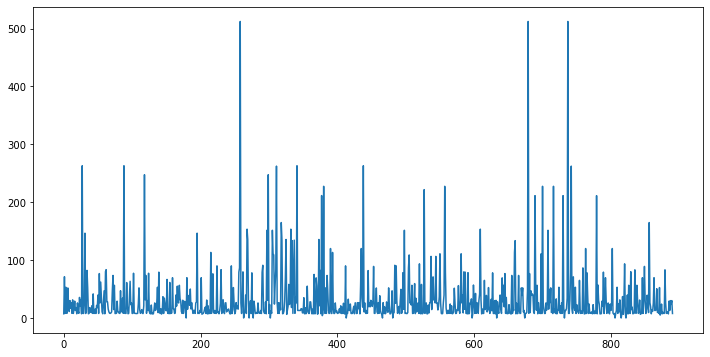

In [176]:
plt.figure(figsize = (12,6))
titanic.Fare.plot()
plt.show()

^^ cool, no outliers

## Handling/ Removing Outliers

we can delete, replace or ignore them.


### titanic dataset

In [177]:
titanic.head()

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [178]:
titanic.loc[titanic.Age > 90]

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
217,0,2,male,102.0,1,0,27.0000,S
453,1,1,male,490.0,1,0,89.1042,C
785,0,3,male,250.0,0,0,7.2500,S


In [181]:
index_outl = titanic.loc[titanic.Age > 90].index

In [182]:
index_outl

Int64Index([217, 453, 785], dtype='int64')

assuming the decimal point should've been one place to the left and was a mistpe, let's fix it

In [183]:
titanic.loc[titanic.Age > 90, 'Age'] = titanic.loc[titanic.Age > 90, 'Age']/10

In [186]:
titanic.loc[index_outl]

,Survived,Class,Gender,Age,Sibsp,Parch,Fare,Emb
217,0,2,male,10.2,1,0,27.0000,S
453,1,1,male,49.0,1,0,89.1042,C
785,0,3,male,25.0,0,0,7.2500,S


In [187]:
titanic.loc[217, 'Age'] = 42.0   # further correcting

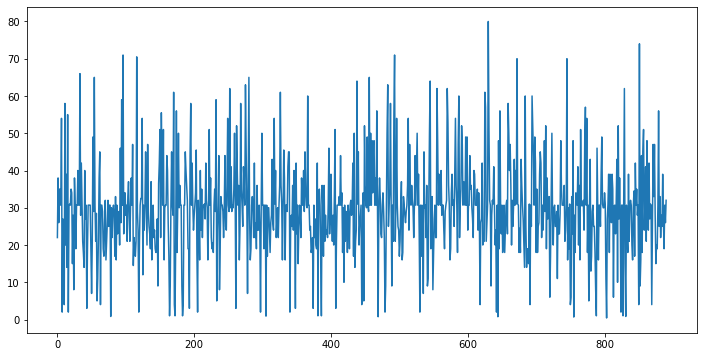

In [188]:
plt.figure(figsize =(12,6))
titanic.Age.plot()
plt.show()